## **Code Blocks for Performing Per-Class Visualizations of Metrics**

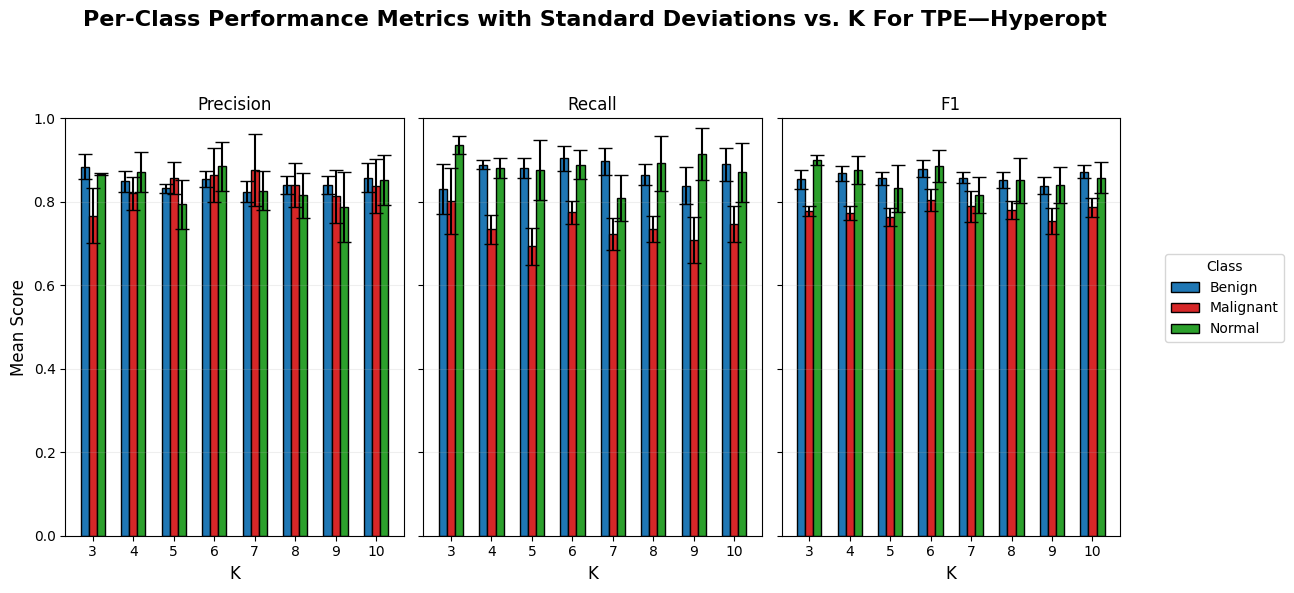

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Import numpy for bar positioning calculations

# Load CSV
df = pd.read_csv('/content/TPE_Hyperopt.csv', encoding='latin1') # Specify the location of the dataset

# --- FIX START: Convert Mean and Std columns to numeric, handling non-numeric characters ---
numeric_cols = ['Precision_Mean', 'Precision_Std', 'Recall_Mean', 'Recall_Std', 'F1_Mean', 'F1_Std']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(u'\xa0', u'').str.strip().replace('', '0').astype(float)
# --- FIX END ---

classes = df['Class'].unique()
metrics = ['Precision', 'Recall', 'F1']
markers = {'Benign': 'o', 'Malignant': 's', 'Normal': '^'}
colors = {'Benign': 'tab:blue', 'Malignant': 'tab:red', 'Normal': 'tab:green'}
line_styles = {'Benign': '-', 'Malignant': '-.', 'Normal': ':'}

# Create subplots for bar plots only (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True) # Increased figsize to (15, 6)

# Collect handles and labels for the legend explicitly using proxy artists
legend_handles = []
legend_labels = []

# Define bar width for bar plots
bar_width = 0.2
# Calculate base positions for bars to be grouped around K values
base_x_positions = df['K'].unique()

for i, metric in enumerate(metrics):
    ax = axes[i] # Current subplot for the bar plot

    # Calculate the total width of all bars for a single K value group
    total_bar_group_width = len(classes) * bar_width
    # Calculate the starting offset for the first bar in each group
    start_offset = - (total_bar_group_width - bar_width) / 2

    for j, cls in enumerate(classes):
        subset = df[df['Class'] == cls]
        mean_col = f'{metric}_Mean'
        std_col = f'{metric}_Std'

        # Calculate the exact x position for each bar, shifted by its index and the start_offset
        current_x_positions = base_x_positions + start_offset + j * bar_width

        ax.bar(current_x_positions, subset[mean_col], yerr=subset[std_col],
                width=bar_width, color=colors[cls], capsize=5, edgecolor='black')

        # Create proxy artists for the legend only once (from the first subplot's iteration)
        if i == 0:
            proxy_bar = plt.Rectangle((0, 0), 1, 1, # A dummy rectangle for the bar legend
                                      fc=colors[cls],
                                      edgecolor='black')
            legend_handles.append(proxy_bar)
            legend_labels.append(cls)

    ax.set_xlabel('K', fontsize=12)
    ax.set_title(f'{metric}', fontsize=12)
    ax.grid(True, axis='y', alpha=0.2) # Made horizontal grid lines fainter
    if i == 0:
        ax.set_ylabel('Mean Score', fontsize=12)

    # Set x-ticks to be the actual K values and labels
    ax.set_xticks(base_x_positions)
    ax.set_xticklabels(base_x_positions.astype(int))
    ax.set_ylim(0, 1)

fig.suptitle('Per-Class Performance Metrics with Standard Deviations vs. K For TPE—Hyperopt', fontsize=16, fontweight='bold')

# Create the legend using the collected proxy handles and labels
# Place the legend on the right of the figure
fig.legend(handles=legend_handles, labels=legend_labels, title='Class', loc='center right', bbox_to_anchor=(1.08, 0.5), ncol=1)
plt.tight_layout(rect=[0, 0, 0.95, 0.92]) # Adjusted rect for legend space and title proximity

# Save figure with new filenames
plt.savefig('bayesian_per_class_metrics_barplot.png', dpi=300)
plt.savefig('bayesian_per_class_metrics_barplot.pdf')
plt.show()